# Intro

## What is PyTorch?

- Python-based scientific computing package serving two broad purposes: [1]
 - NumPy replacement to use the power of GPUs and other accelerators
 - Automatic differentiation library that is useful to implement neural network

## References

[1] https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html

## Goal of This Notebook

- Understand PyTorch's Tensor library and NN at a high level
- Train a small NN to classify images

In [1]:
## installation

# !pip install torch torchvision

     |████████████████████████████████| 1.0 MB 2.0 MB/s eta 0:00:01
     |████████████████████████████████| 108.8 MB 160 kB/s  eta 0:00:01    |███▊                            | 12.7 MB 20.4 MB/s eta 0:00:05     |██████▉                         | 23.1 MB 19.5 MB/s eta 0:00:05     |███████▊                        | 26.4 MB 19.5 MB/s eta 0:00:05     |███████████▏                    | 38.2 MB 15.9 MB/s eta 0:00:05     |███████████▌                    | 39.2 MB 15.9 MB/s eta 0:00:05     |█████████████▉                  | 46.9 MB 15.9 MB/s eta 0:00:04     |████████████████████▏           | 68.6 MB 21.1 MB/s eta 0:00:02     |████████████████████▌           | 69.8 MB 21.1 MB/s eta 0:00:02     |██████████████████████          | 74.6 MB 21.1 MB/s eta 0:00:02     |███████████████████████████▉    | 94.6 MB 21.0 MB/s eta 0:00:01     |█████████████████████████████▉  | 101.6 MB 11.6 MB/s eta 0:00:01     |██████████████████████████████▌ | 103.9 MB 11.6 MB/s eta 0:00:01     |███████████████████████████

# Tutorial

In [2]:
import torch
import numpy as np

## Tensor Initialization

### Directly from data

In [3]:
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)

### From a Numpy array

In [4]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

### From another tensor

In [5]:
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.9000, 0.4383],
        [0.5032, 0.8588]]) 



### With random or constant values

In [6]:
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.6875, 0.8649, 0.7991],
        [0.2807, 0.2516, 0.0147]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


## Tensor Attributes

In [8]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


## Tensor Operations

In [10]:
# We move our tensor to the GPU if available
if torch.cuda.is_available():
  tensor = tensor.to('cuda')

### Standard numpy-like indexing and slicing:

In [11]:
tensor = torch.ones(4, 4)
tensor[:,1] = 0
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


### Joining Tensor

In [12]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


### Multiplying Tensors

In [13]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


In [15]:
# computes the matrix multiplication between two tensors
print(f"tensor.matmul(tensor.T) \n {tensor.matmul(tensor.T)} \n")
# Alternative syntax:
print(f"tensor @ tensor.T \n {tensor @ tensor.T}")

tensor.matmul(tensor.T) 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]]) 

tensor @ tensor.T 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])


## A Gentle Introduction to `torch.autograd`

- `torch.autograd` is PyTorch’s automatic differentiation engine that powers neural network training. [ref](https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html)

### Background

- Training in NN happens in 2 steps:
 - Forward Propagation: NN makes its best guess about the correct output. It runs the input ata through each of its functions to make this guess.
 - Backward Propagation: NN adjusts its parameters proportionate to the error in its guess. Traversing backward from the output, collecting the derivatives of the error with respect to the parameters of the functions (gradients), and optimizing the parameters using gradient descent

### Usage in PyTorch

In [17]:
import ssl 
ssl._create_default_https_context = ssl._create_unverified_context

In [18]:
import torch, torchvision
model = torchvision.models.resnet18(pretrained=True)
data = torch.rand(1, 3, 64, 64)
labels = torch.rand(1, 1000)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /Users/enlik/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


In [19]:
prediction = model(data) # forward pass

In [20]:
loss = (prediction - labels).sum()
loss.backward() # backward pass

In [21]:
optim = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)

In [22]:
optim.step() #gradient descent

### Differentiation in Autograd

In [23]:
import torch

a = torch.tensor([2., 3.], requires_grad=True)
b = torch.tensor([6., 4.], requires_grad=True)

In [24]:
Q = 3*a**3 - b**2

In [25]:
external_grad = torch.tensor([1., 1.])
Q.backward(gradient=external_grad)

In [26]:
# check if collected gradients are correct
print(9*a**2 == a.grad)
print(-2*b == b.grad)

tensor([True, True])
tensor([True, True])


### Exclusion from the DAG

In [27]:
x = torch.rand(5, 5)
y = torch.rand(5, 5)
z = torch.rand((5, 5), requires_grad=True)

a = x + y
print(f"Does `a` require gradients? : {a.requires_grad}")
b = x + z
print(f"Does `b` require gradients?: {b.requires_grad}")

Does `a` require gradients? : False
Does `b` require gradients?: True


In [28]:
from torch import nn, optim

model = torchvision.models.resnet18(pretrained=True)

# Freeze all the parameters in the network
for param in model.parameters():
    param.requires_grad = False


In [29]:
model.fc = nn.Linear(512, 10)

In [30]:
# Optimize only the classifier
optimizer = optim.SGD(model.fc.parameters(), lr=1e-2, momentum=0.9)

## Neural Networks

### Define the Networks

In [31]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 3x3 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 6 * 6, 120)  # 6*6 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [32]:
params = list(net.parameters())
print(len(params))
print(params[0].size())  # conv1's .weight

10
torch.Size([6, 1, 3, 3])


In [33]:
input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)

tensor([[-0.0422,  0.0593, -0.0816, -0.1164,  0.0819,  0.0318, -0.0383,  0.0303,
         -0.1104,  0.0257]], grad_fn=<AddmmBackward>)


In [34]:
net.zero_grad()
out.backward(torch.randn(1, 10))

### Loss Function

In [35]:
output = net(input)
target = torch.randn(10)  # a dummy target, for example
target = target.view(1, -1)  # make it the same shape as output
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor(1.1482, grad_fn=<MseLossBackward>)


In [36]:
print(loss.grad_fn)  # MSELoss
print(loss.grad_fn.next_functions[0][0])  # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU

### Backprop

In [37]:
net.zero_grad()     # zeroes the gradient buffers of all parameters

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
tensor([0., 0., 0., 0., 0., 0.])
conv1.bias.grad after backward
tensor([ 0.0037, -0.0061, -0.0137,  0.0082, -0.0066, -0.0049])


### Update the weights

In [38]:
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)

In [39]:
import torch.optim as optim

# create your optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

# in your training loop:
optimizer.zero_grad()   # zero the gradient buffers
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()    # Does the update

## Training a Classifier

In [40]:
import torch
import torchvision
import torchvision.transforms as transforms

In [41]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


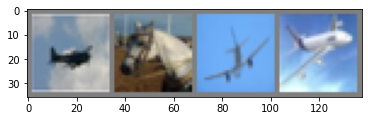

plane horse plane plane


In [42]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

### Define a CNN (Convolution NN)

In [43]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

### Define a Loss Function and Optimizer

In [44]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

### Train the network

In [46]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.176
[1,  4000] loss: 1.835
[1,  6000] loss: 1.666
[1,  8000] loss: 1.561
[1, 10000] loss: 1.497
[1, 12000] loss: 1.442
[2,  2000] loss: 1.376
[2,  4000] loss: 1.352
[2,  6000] loss: 1.304
[2,  8000] loss: 1.282
[2, 10000] loss: 1.279
[2, 12000] loss: 1.265
Finished Training


In [47]:
# save our trained model
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

### Test the network on the test data

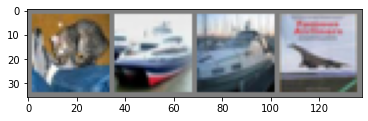

GroundTruth:    cat  ship  ship plane


In [48]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [49]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [50]:
outputs = net(images)

In [51]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat   car  ship plane


In [52]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 56 %


In [53]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 65 %
Accuracy of   car : 77 %
Accuracy of  bird : 44 %
Accuracy of   cat : 25 %
Accuracy of  deer : 43 %
Accuracy of   dog : 54 %
Accuracy of  frog : 60 %
Accuracy of horse : 70 %
Accuracy of  ship : 58 %
Accuracy of truck : 68 %


### Training on GPU

In [54]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cpu


In [55]:
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [56]:
inputs, labels = data[0].to(device), data[1].to(device)

## Optional: Data Parallelism

Tutorial on https://pytorch.org/tutorials/beginner/blitz/data_parallel_tutorial.html